In [1]:
from erpe.analysis import *
from erpe.models import *
from erpe.experiment_design import *

# autorload 
%load_ext autoreload
%autoreload 2

# Create an RPE experiment design

In [2]:
depths = [2**i for i in range(10)]
edesign_XI = EDesign_1QXI(depths, ['Q0'])
edesign_CZ = EDesign_CZ(depths, ['Q0', 'Q1'])

In [3]:
print(len(edesign_XI.circuit_list), len(edesign_CZ.circuit_list))

59 60


In [4]:
edesign_XI.germs

[Circuit(Gxpi2:Q0@(Q0)),
 Circuit(Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0@(Q0)),
 Circuit(Gi:Q0@(Q0))]

In [5]:
edesign_CZ.germs

[Circuit(Gcz:Q0:Q1@(Q0,Q1))]

# Create a model and simulate data

In [6]:
xvec = np.array([0.1, 0.2, 0.3])
model_1Q = create_XI_model_1q(xvec, qid='Q0')
model_2Q = create_CZ_model(xvec)
model_1Q_target = create_XI_model_1q(np.zeros(3), qid='Q0')
model_2Q_target = create_CZ_model(np.zeros(3))


In [7]:
num_shots = 1000
ds_XI = edesign_XI.make_dataset(model_1Q, num_shots)
ds_CZ = edesign_CZ.make_dataset(model_2Q, num_shots)

# Analyze data

In [8]:
analysis_cz = Analysis_CZ(ds_CZ, edesign_CZ)
analysis_xi = Analysis_XI(ds_XI, edesign_XI)

In [9]:
analysis_cz.raw_estimates

{Circuit(Gcz:Q0:Q1@(Q0,Q1)): {'0+': array([0.45155839, 0.40207749, 0.39869793, 0.39544864, 0.39546388,
         0.39883074, 0.40003986, 0.39997476, 0.40012904, 0.39998345]),
  '1+': array([2.98509601, 2.96196808, 2.94766351, 2.94449312, 2.94161493,
         2.94105558, 2.94071582, 2.9417348 , 2.94161473, 2.94154552]),
  '+1': array([3.05111455, 3.09377974, 3.03606322, 3.0397061 , 3.04291789,
         3.0396166 , 3.04101144, 3.04157278, 3.04167713, 3.0416217 ])}}

In [10]:
analysis_xi.estimates

{'X overrot': np.float64(0.10006891795610007),
 'X axis': np.float64(0.2114365865184611),
 'idle': np.float64(0.30010200401848053)}

In [11]:
analysis_cz.estimates

{'IZ': np.float64(0.09996815904463752),
 'ZI': np.float64(0.20004433206059957),
 'ZZ': np.float64(0.3000152883906835)}

# Display counts

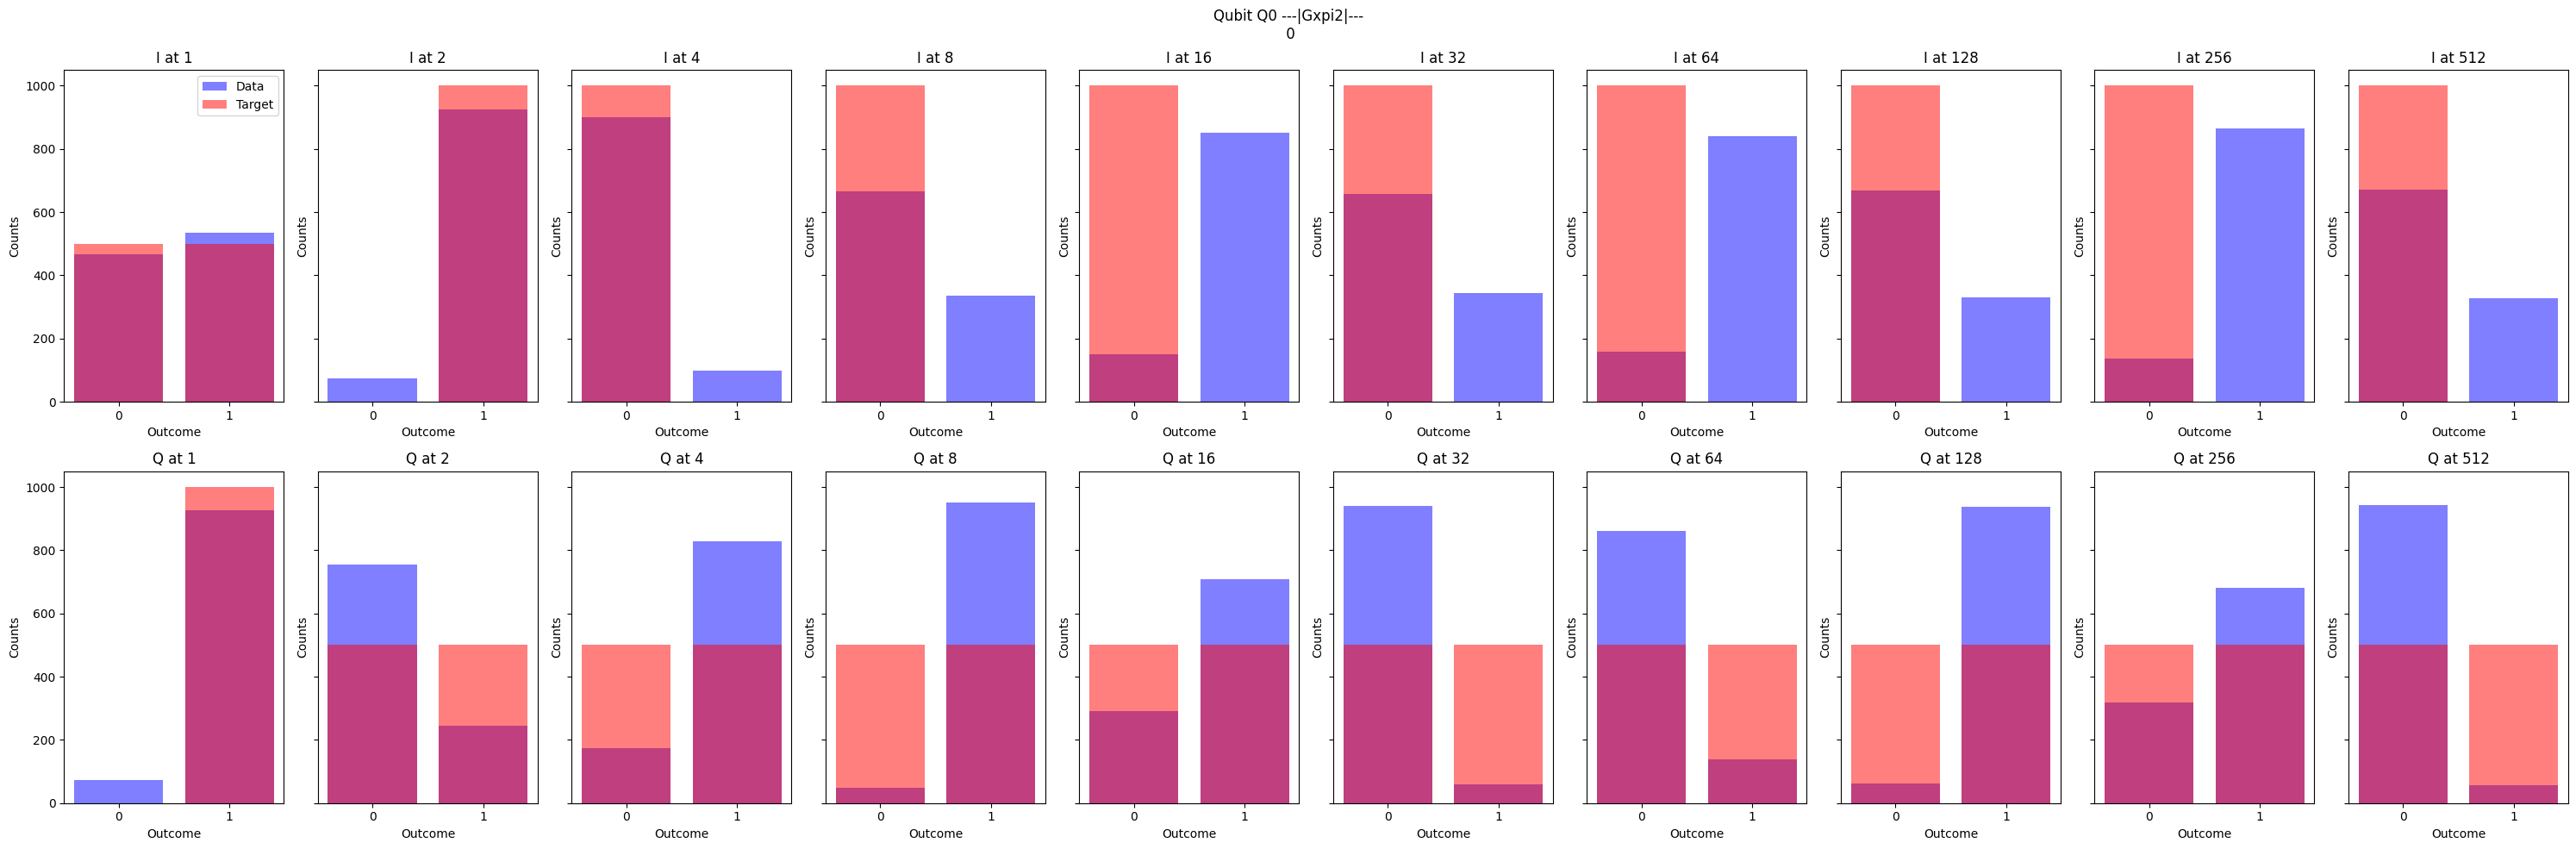

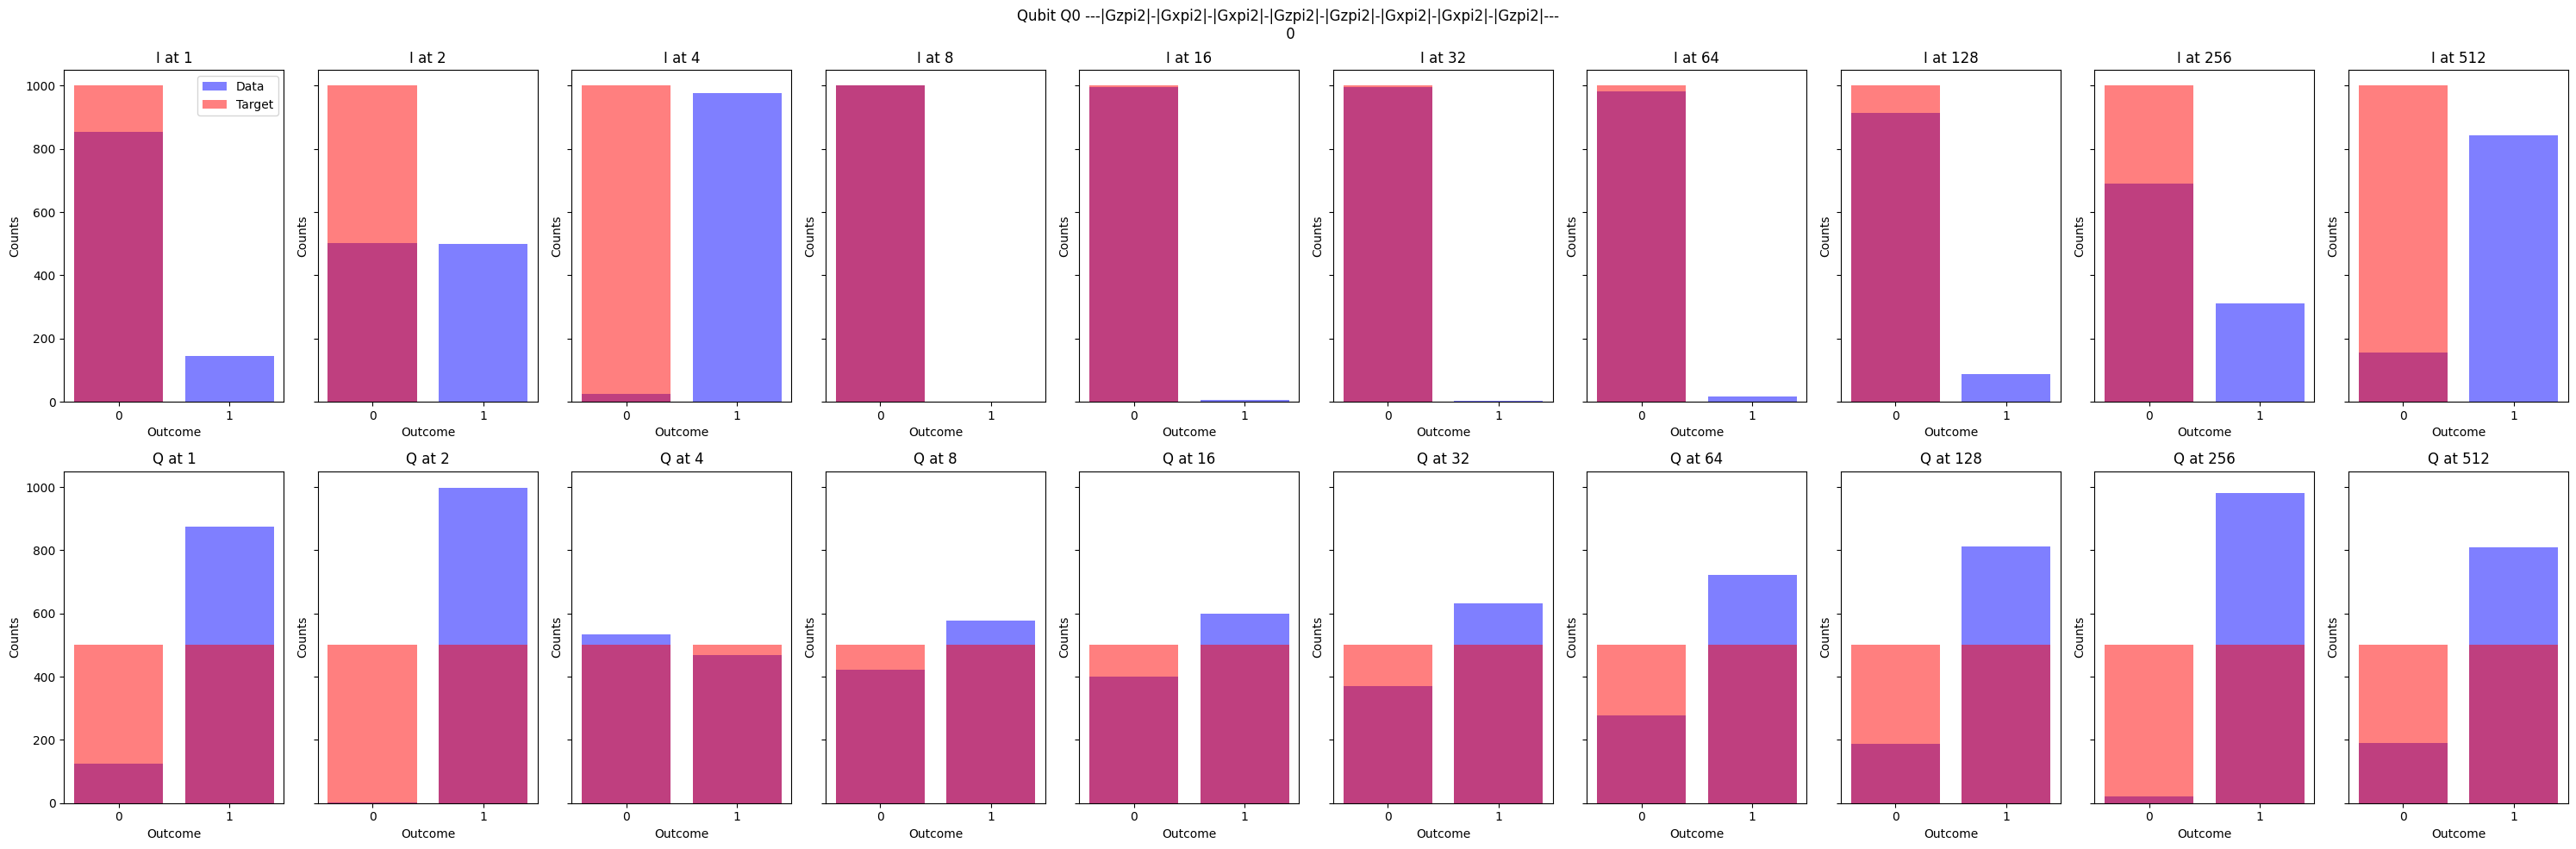

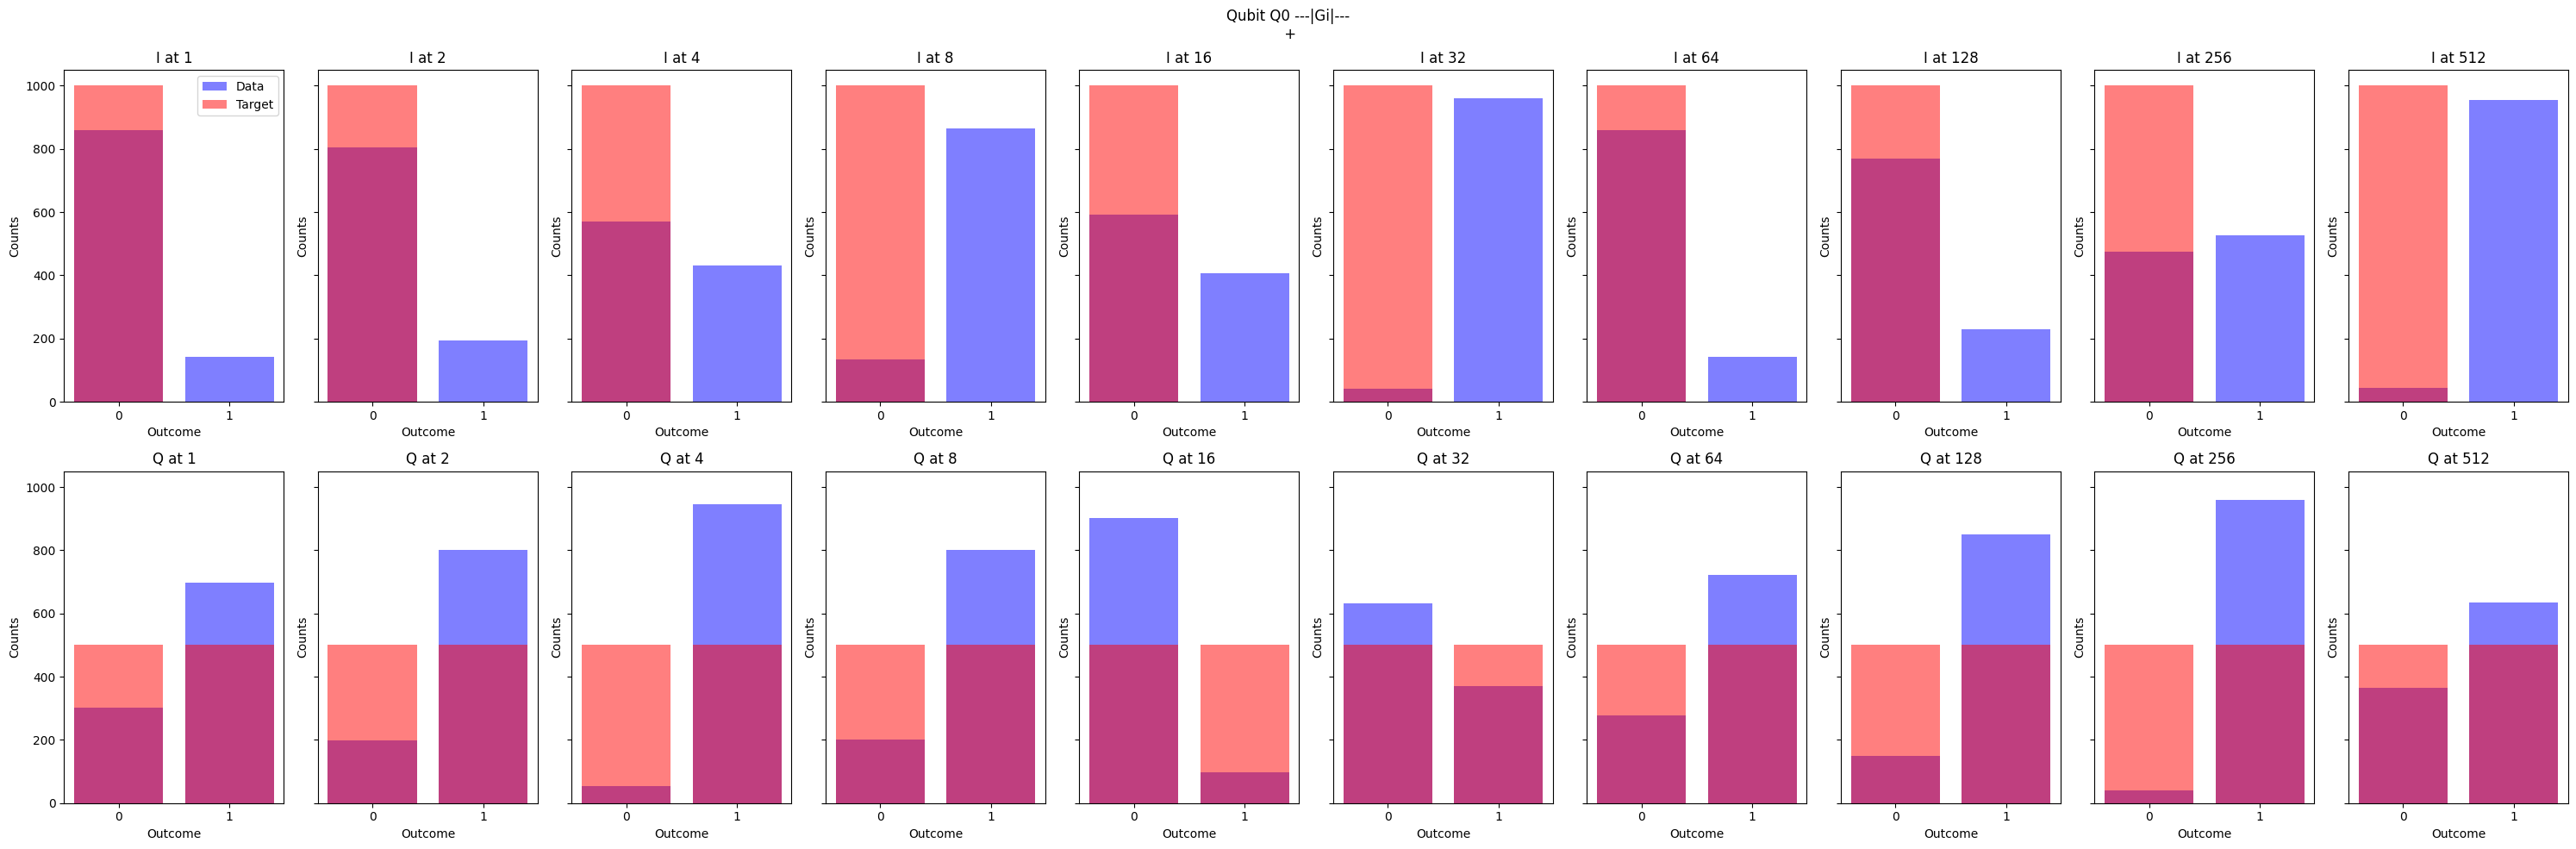

In [12]:
analysis_xi.plot_dataset(model_1Q_target)

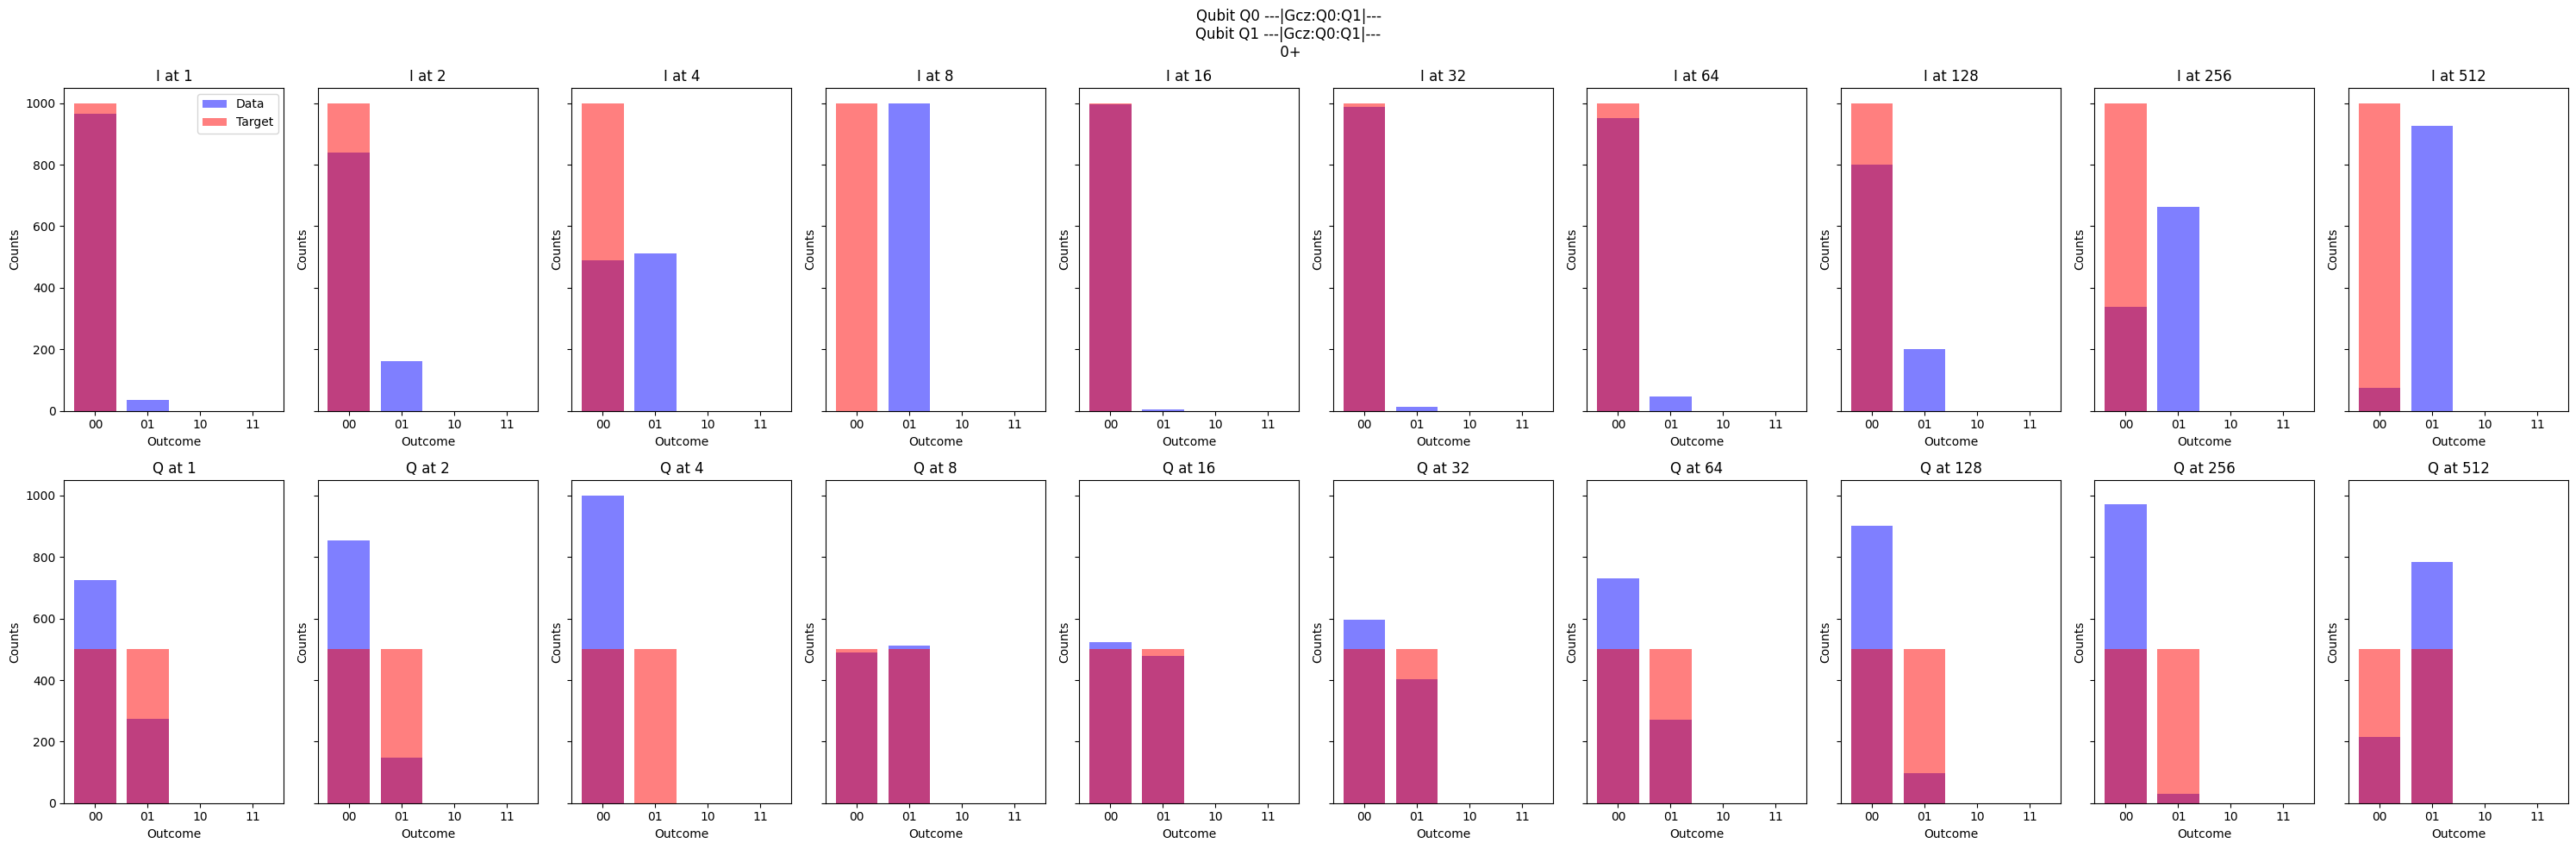

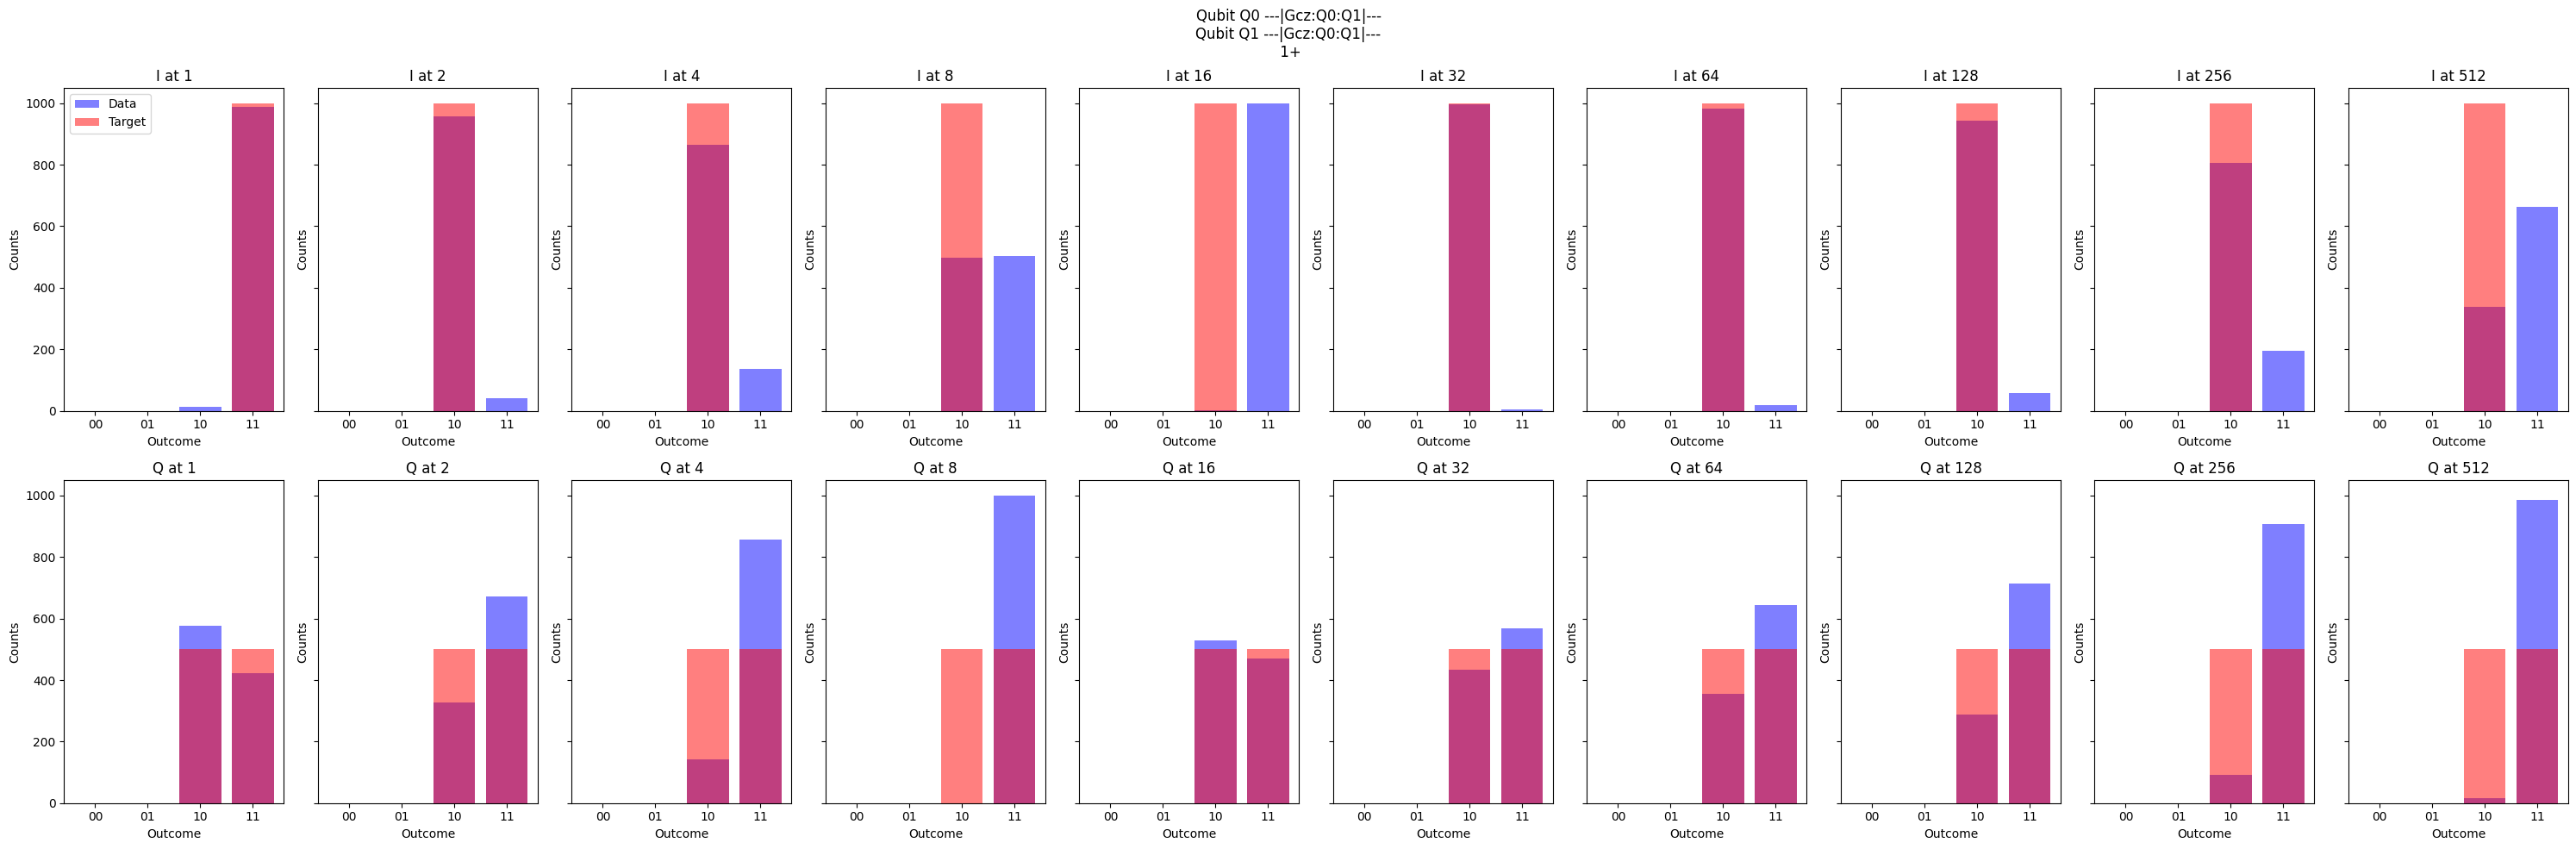

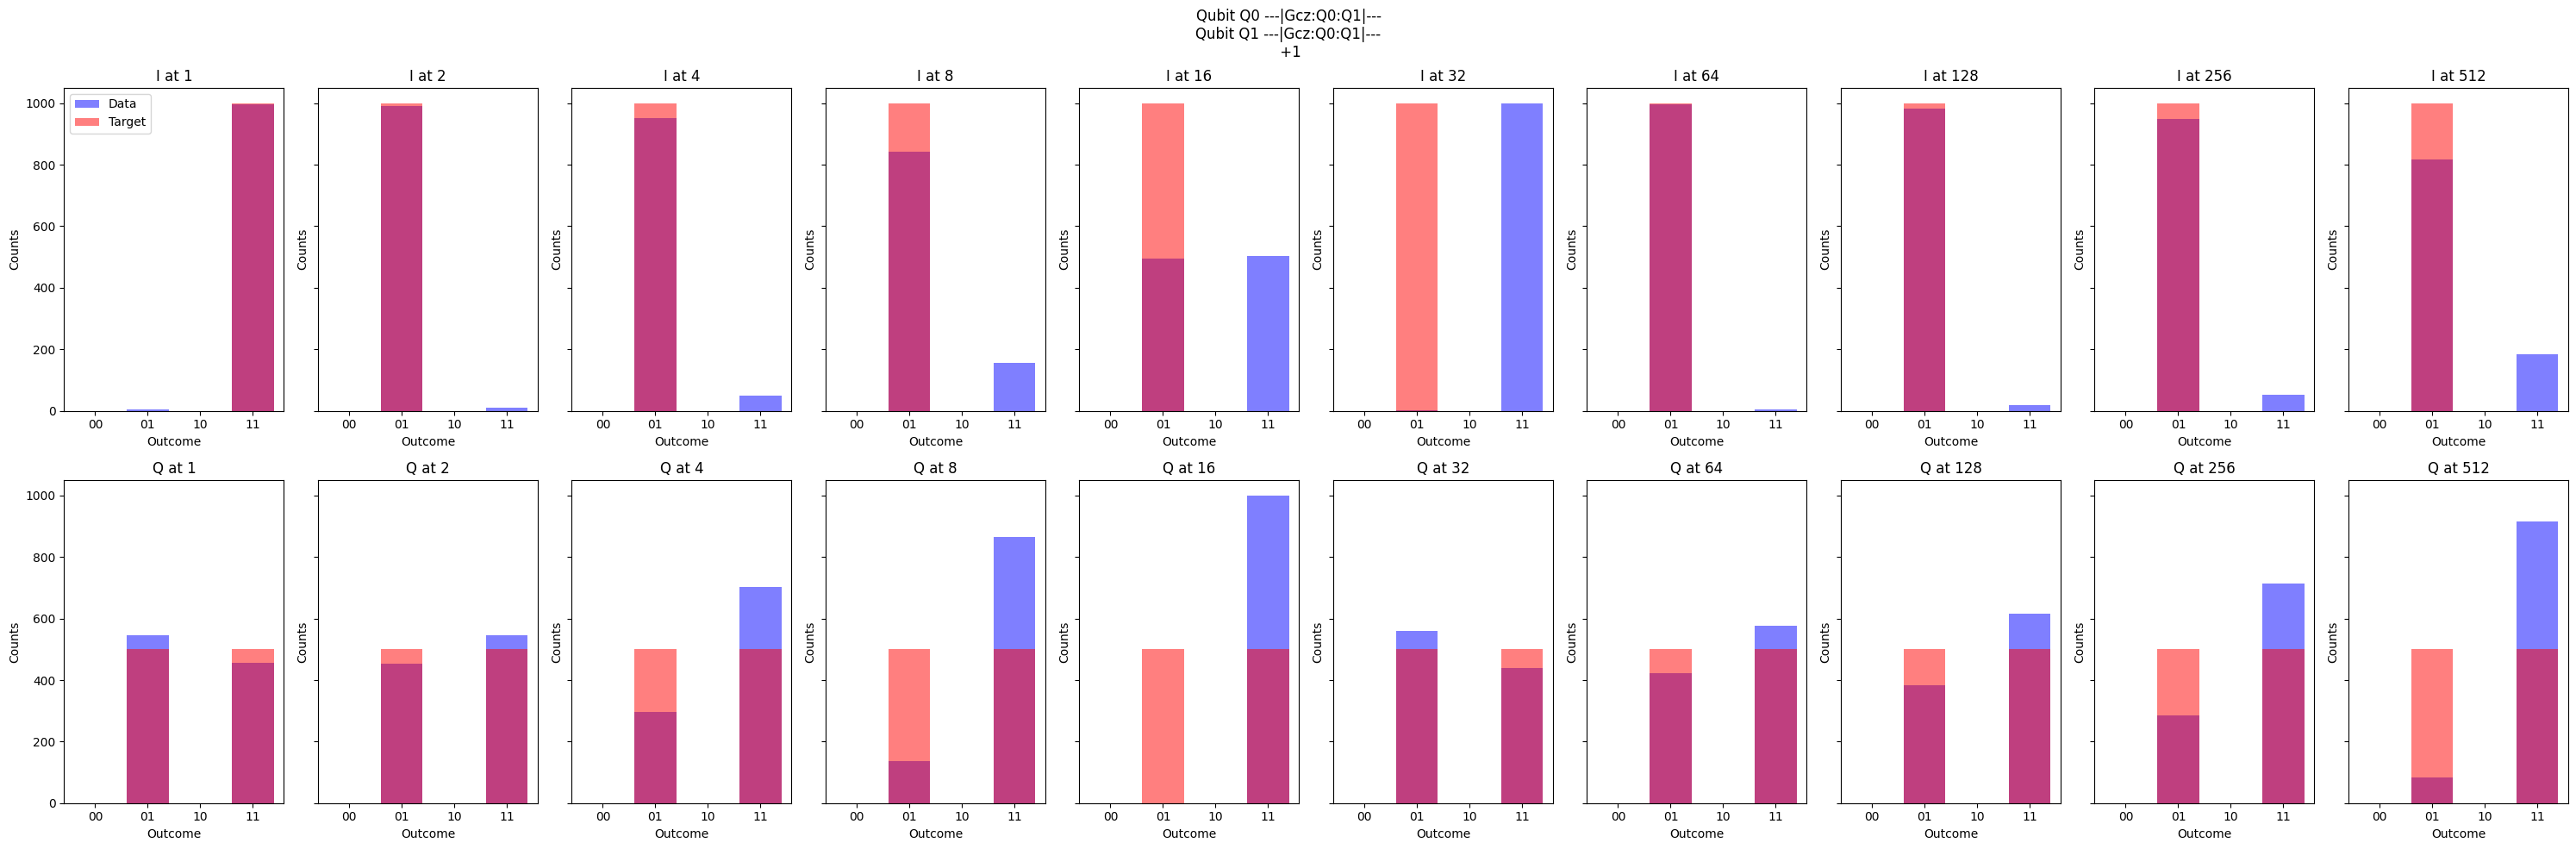

In [13]:
analysis_cz.plot_dataset(target_model=model_2Q_target)

# Plot Signals

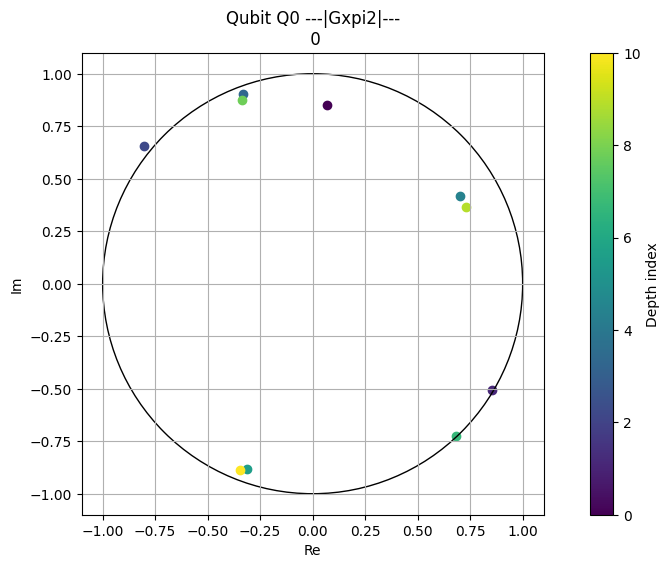

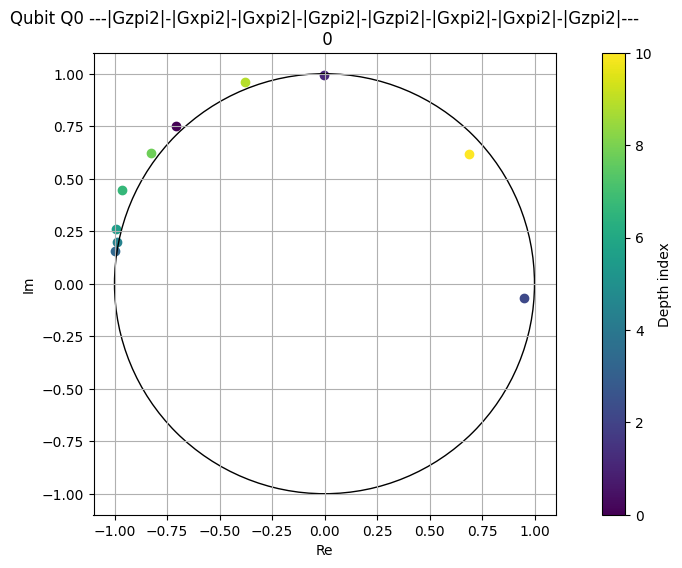

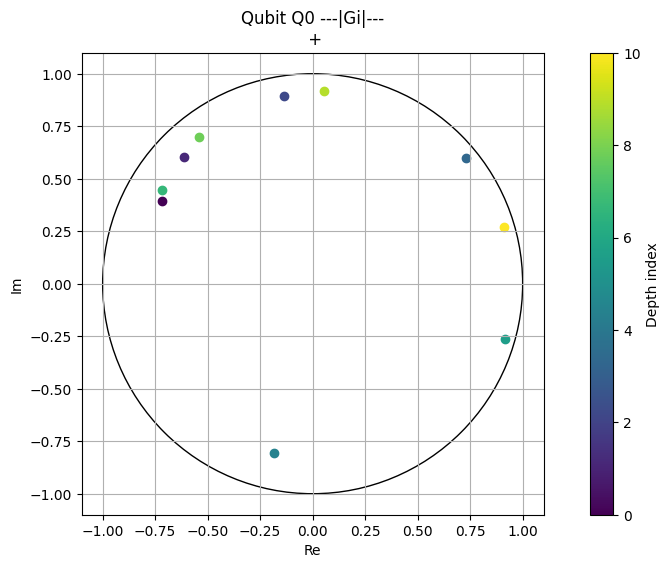

In [14]:
analysis_xi.plot_all_signals()

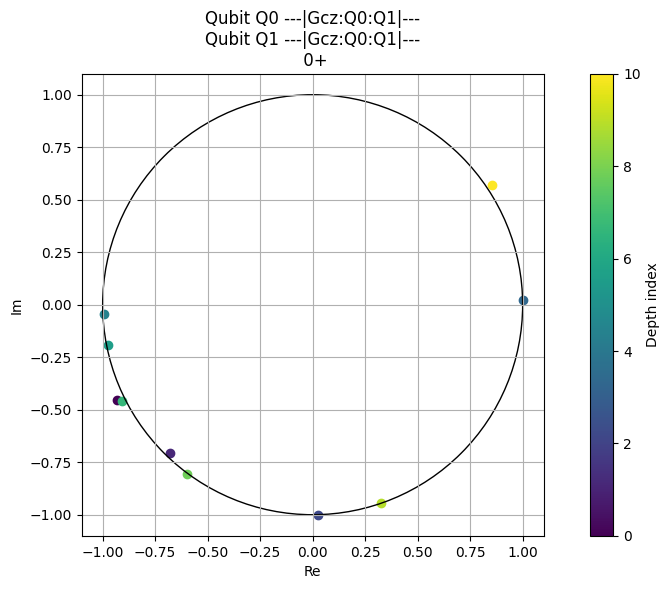

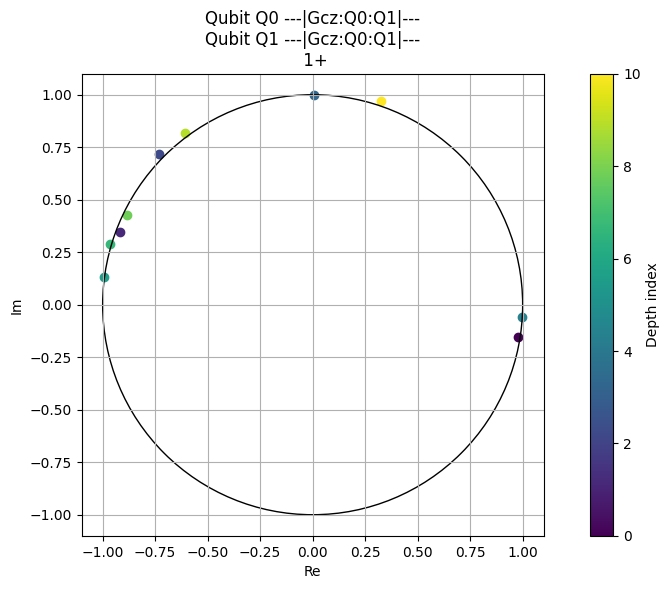

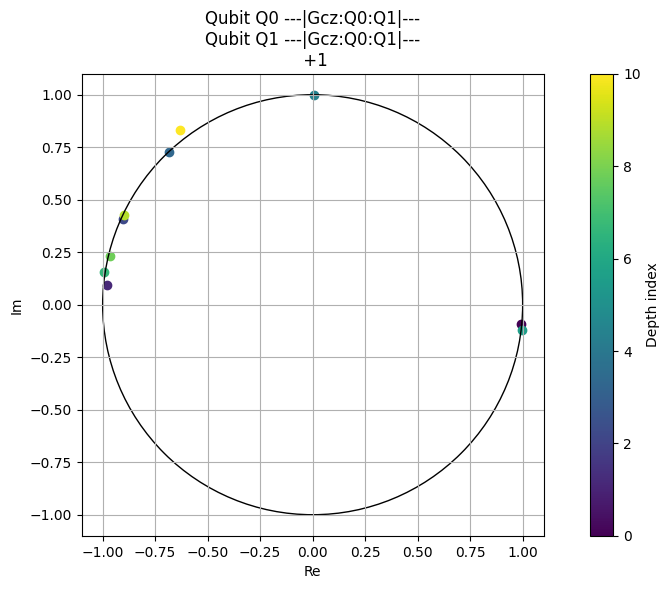

In [15]:
analysis_cz.plot_all_signals()